In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [32]:
house_info= pd.read_csv("housing_prices.csv")
house_info

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,sqft_above,sqft_basement,city,country
0,3.130000e+05,3.0,1.50,1340.0,1.5,0.0,0.0,1340.0,0.0,Shoreline,USA
1,2.384000e+06,5.0,2.50,3650.0,2.0,0.0,4.0,3370.0,280.0,Seattle,USA
2,3.420000e+05,3.0,2.00,1930.0,1.0,0.0,0.0,1930.0,0.0,Kent,USA
3,4.200000e+05,3.0,2.25,2000.0,1.0,0.0,0.0,1000.0,1000.0,Bellevue,USA
4,5.500000e+05,4.0,2.50,1940.0,1.0,0.0,0.0,1140.0,800.0,Redmond,USA
...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510.0,1.0,0.0,0.0,1510.0,0.0,Seattle,USA
4596,5.343333e+05,3.0,2.50,1460.0,2.0,0.0,0.0,1460.0,0.0,Bellevue,USA
4597,4.169042e+05,3.0,2.50,3010.0,2.0,0.0,0.0,3010.0,0.0,Renton,USA
4598,2.034000e+05,4.0,2.00,2090.0,1.0,0.0,0.0,1070.0,1020.0,Seattle,USA


#features has relative order like grades (gpa) >>>>> ordinal
 # no relative order (gender)>>>>> nominal

In [33]:
house_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4599 non-null   float64
 1   bedrooms       4599 non-null   float64
 2   bathrooms      4594 non-null   float64
 3   sqft_living    4566 non-null   float64
 4   floors         4589 non-null   float64
 5   waterfront     4587 non-null   float64
 6   view           4594 non-null   float64
 7   sqft_above     4593 non-null   float64
 8   sqft_basement  4598 non-null   float64
 9   city           4600 non-null   object 
 10  country        4600 non-null   object 
dtypes: float64(9), object(2)
memory usage: 395.4+ KB


In [34]:
house_info.isnull().sum()
# finding missing values

price             1
bedrooms          1
bathrooms         6
sqft_living      34
floors           11
waterfront       13
view              6
sqft_above        7
sqft_basement     2
city              0
country           0
dtype: int64

In [35]:
# filling the missing values in sqft living 
house_info["sqft_living"]=house_info["sqft_living"].fillna(np.mean(house_info["sqft_living"]))
house_info.isnull().sum()

price             1
bedrooms          1
bathrooms         6
sqft_living       0
floors           11
waterfront       13
view              6
sqft_above        7
sqft_basement     2
city              0
country           0
dtype: int64

In [36]:
house_info=house_info.dropna()
house_info.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
floors           0
waterfront       0
view             0
sqft_above       0
sqft_basement    0
city             0
country          0
dtype: int64

In [37]:
x_input =house_info.drop(["price","city","country"],axis=1)
y_output=house_info["price"]

In [38]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_input,y_output)
model.score(x_input,y_output)

0.20128051729201257

Data cleaning to improve accuracy

In [39]:
house_info.describe()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,sqft_above,sqft_basement
count,4.554000e+03,4554.000000,4554.000000,4554.000000,4554.000000,4554.000000,4554.000000,4554.000000,4554.000000
mean,5.527701e+05,3.402723,2.162934,2141.938922,1.513395,0.007246,0.239789,1829.556653,312.464866
std,5.660575e+05,0.909646,0.784553,963.232210,0.537458,0.084826,0.778041,864.090756,464.583498
min,0.000000e+00,0.000000,0.000000,370.000000,1.000000,0.000000,0.000000,370.000000,0.000000
25%,3.238750e+05,3.000000,1.750000,1470.000000,1.000000,0.000000,0.000000,1190.000000,0.000000
50%,4.620000e+05,3.000000,2.250000,1980.000000,1.500000,0.000000,0.000000,1590.000000,0.000000
75%,6.550000e+05,4.000000,2.500000,2617.500000,2.000000,0.000000,0.000000,2302.250000,610.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,3.500000,1.000000,4.000000,9410.000000,4820.000000


<Axes: xlabel='price', ylabel='Count'>

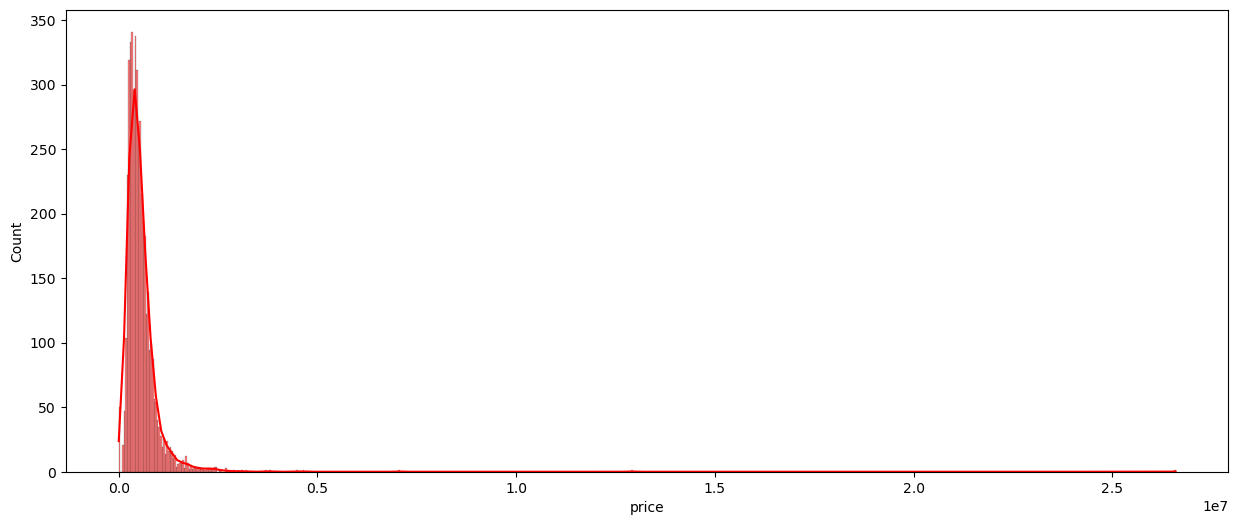

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,6))
# kde will draw a line over the distripution of the data to figure out some small points
sns.histplot(house_info["price"],kde=True,color="red")
# if i have interval from 0 to 1M and bins equal 10 so it will split  it into10 equal parts
# then it will take ex frist interval which will be from 0 to 100k and count number of houses
# that have  a price in this range

'\nSo, in summary, this code is filtering a DataFrame based\n on the price column, and then creating a red histogram \n(with a KDE) of the price values that meet the filtering criteria.\n The histogram provides a visual representation of the distribution \n of house prices in the filtered data. \n The KDE line provides a smooth curve that \napproximates the shape of that distribution\n'

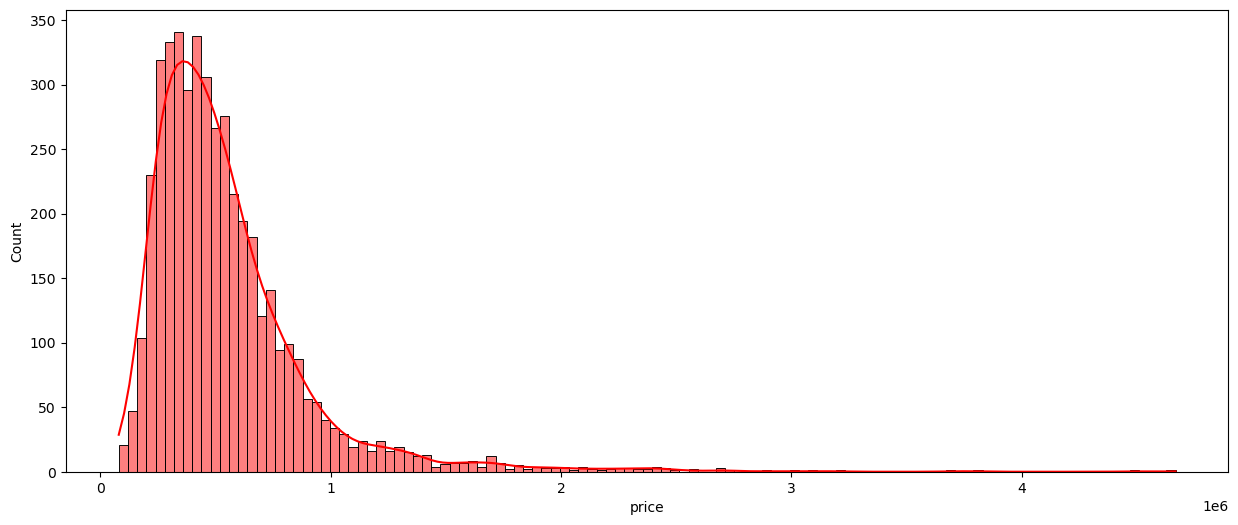

In [41]:
house_info = house_info[house_info["price"]<.5*1e7]
'''
 This line is filtering the house_info DataFrame to
only include rows where the price is less than 5 million 
(0.5 * 10^7). The result is assigned back to house_info,
   effectively updating it.
'''

house_info=house_info[house_info["price"]> 40000]

plt.figure(figsize=(15,6))
# inches
sns.histplot(house_info["price"],kde=True,color="red")

'''
So, in summary, this code is filtering a DataFrame based
 on the price column, and then creating a red histogram 
(with a KDE) of the price values that meet the filtering criteria.
 The histogram provides a visual representation of the distribution 
 of house prices in the filtered data. 
 The KDE line provides a smooth curve that 
approximates the shape of that distribution
'''

#Relation between sqft-living & price


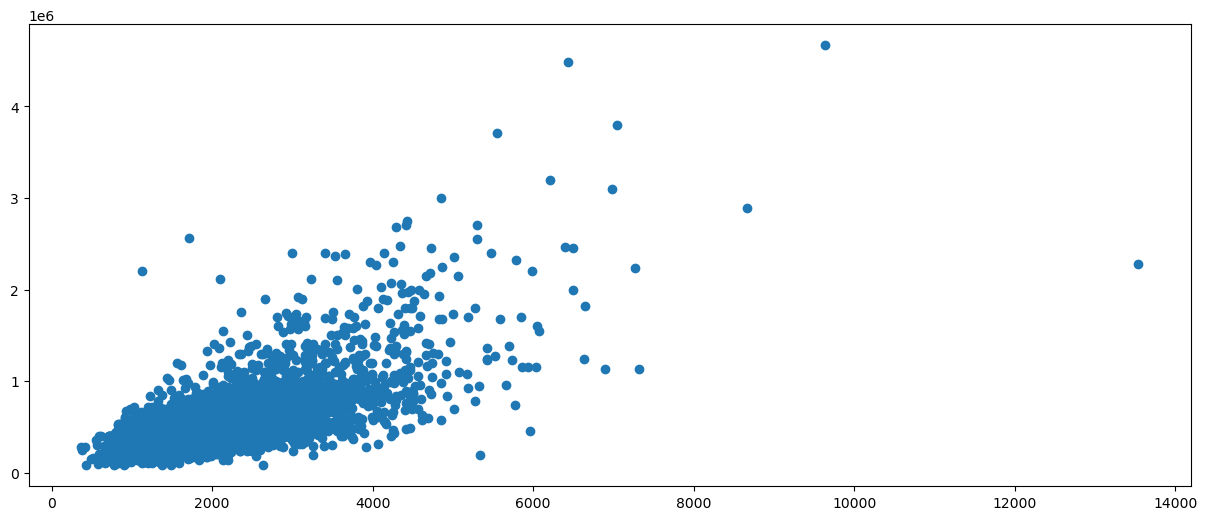

In [42]:
plt.figure(figsize=(15,6))
plt.scatter(x=house_info["sqft_living"],y=house_info["price"])

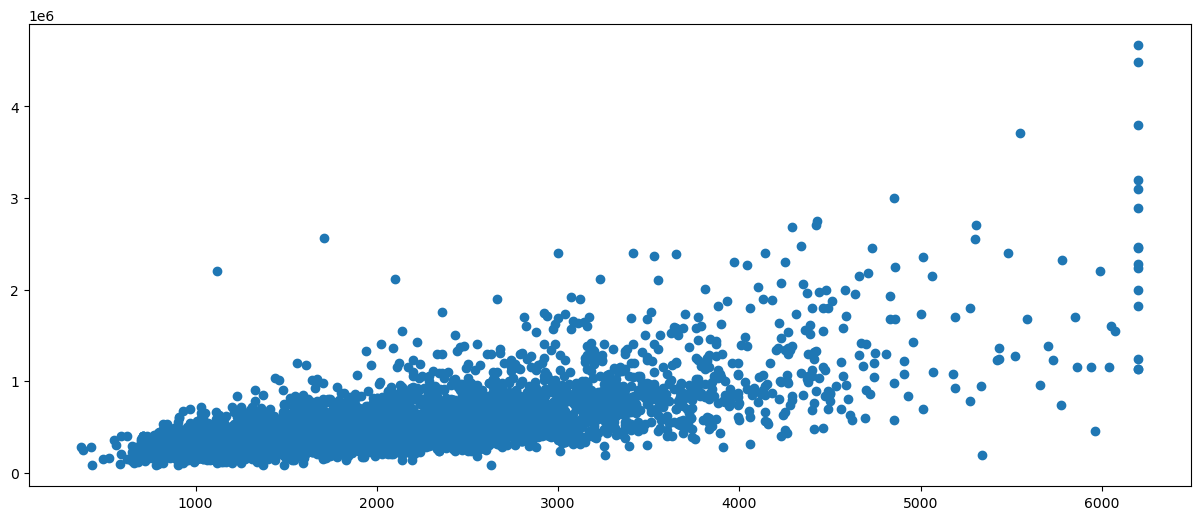

In [43]:
house_info["sqft_living"]=np.where(house_info["sqft_living"]<6200,house_info["sqft_living"],6200)
'''
It takes three arguments:

A condition.
A value to use if the condition is true.
A value to use if the condition is false.

In this case, the condition is house_info["sqft_living"]<6200, 
which checks if the sqft_living value in each row of the house_info DataFrame is less than 6200.

If the condition is true (if sqft_living is less than 6200), then np.
where returns the #original sqft_living value (house_info["sqft_living"]).

If the condition is false (i.e., if sqft_living is 6200 or more), then np.where returns 6200.

The result of this np.where operation is then assigned back to the sqft_living column of the house_info DataFrame. 
This effectively replaces all sqft_living values of 6200 or more with 6200.

So, in summary, this line of code is capping the sqft_living values at 6200.
 Any original sqft_living value that was 6200 or more is replaced with 6200. All other sqft_living values remain unchanged.
   This might be done to remove outliers or to limit the range of sqft_living values for further analysis or visualization.

   '''
plt.figure(figsize=(15,6))
plt.scatter(x=house_info["sqft_living"],y=house_info["price"])

#Relation between sqft_above and price

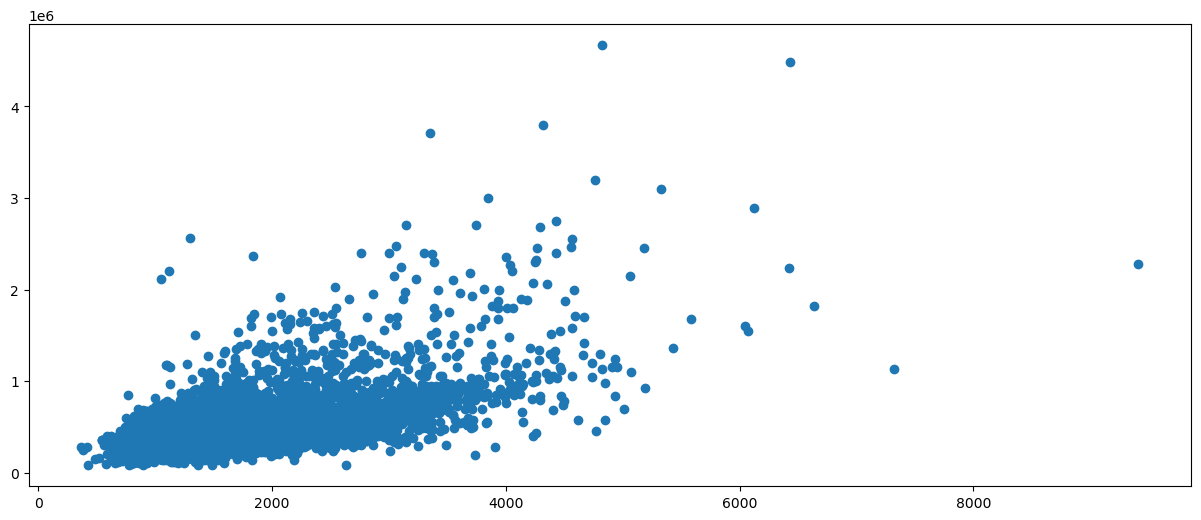

In [44]:
plt.figure(figsize=(15,6))
plt.scatter(x=house_info["sqft_above"],y=house_info["price"])

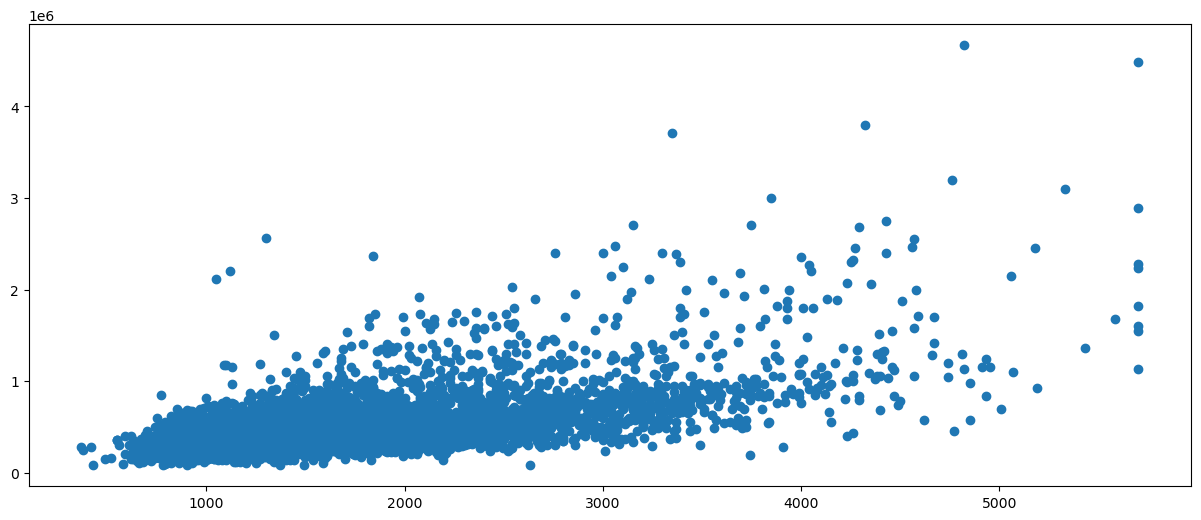

In [45]:
house_info["sqft_above"]=np.where(house_info["sqft_above"]<5700,house_info["sqft_above"],5700)

plt.figure(figsize=(15,6))
plt.scatter(x=house_info["sqft_above"],y=house_info["price"])



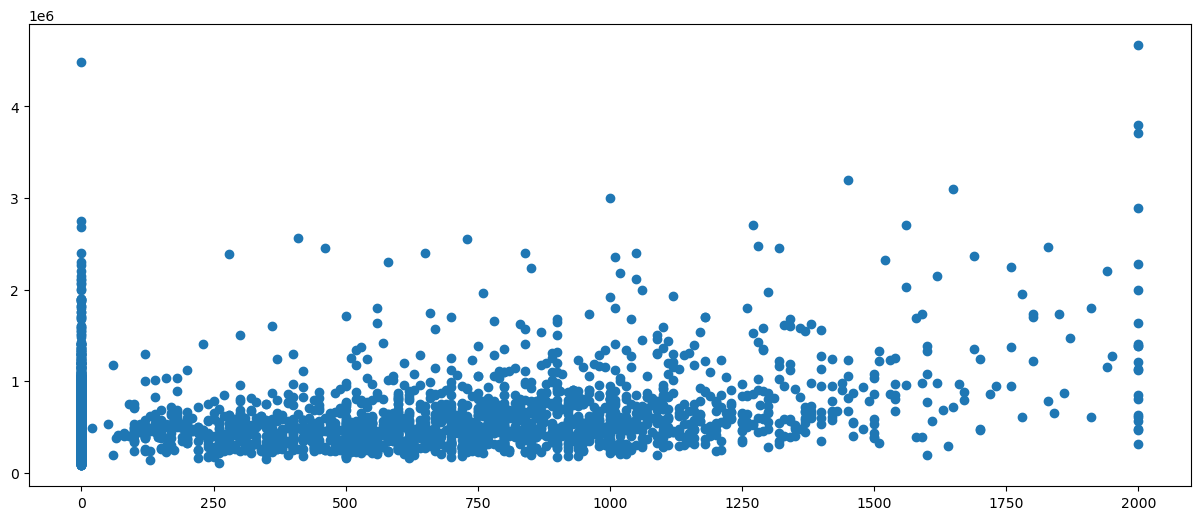

In [46]:
house_info["sqft_basement"]=np.where(house_info["sqft_basement"]<2000,house_info["sqft_basement"],2000)

plt.figure(figsize=(15,6))
plt.scatter(x=house_info["sqft_basement"],y=house_info["price"])


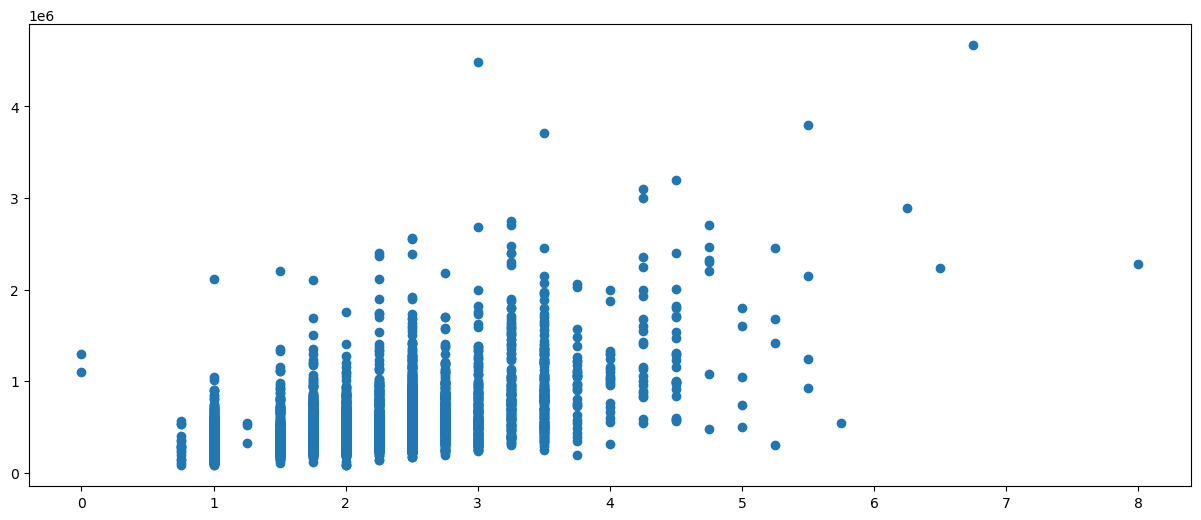

In [47]:
plt.figure(figsize=(15,6))
plt.scatter(x=house_info["bathrooms"],y=house_info["price"])


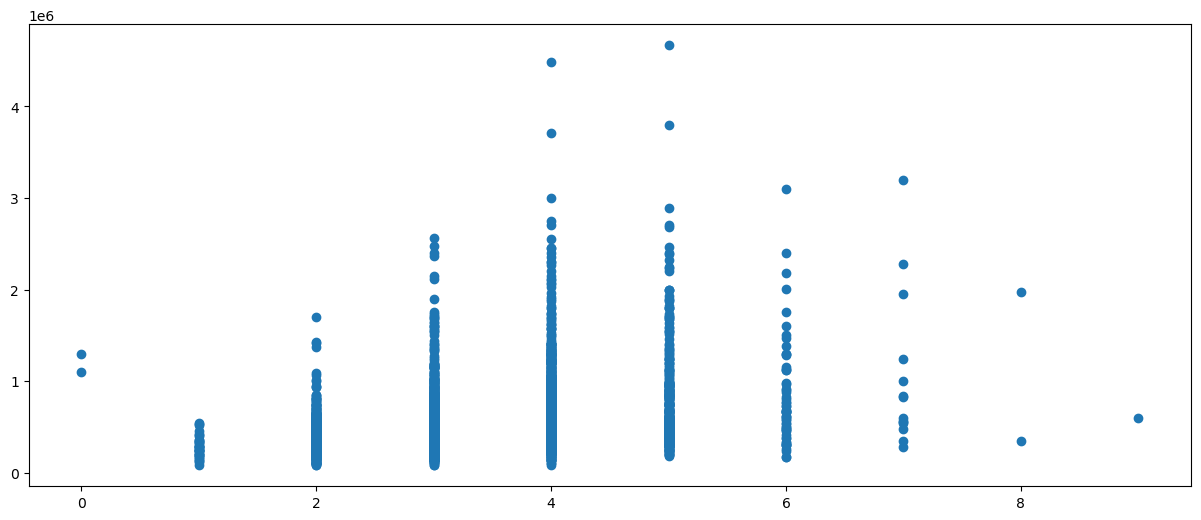

In [48]:
plt.figure(figsize=(15,6))

plt.scatter(x=house_info["bedrooms"],y=house_info["price"])
  
  # oh god what is going on :)

In [49]:
house_info = house_info[house_info["bathrooms"]!=0]
house_info = house_info[house_info["bedrooms"]!=0]


<Axes: xlabel='bedrooms', ylabel='price'>

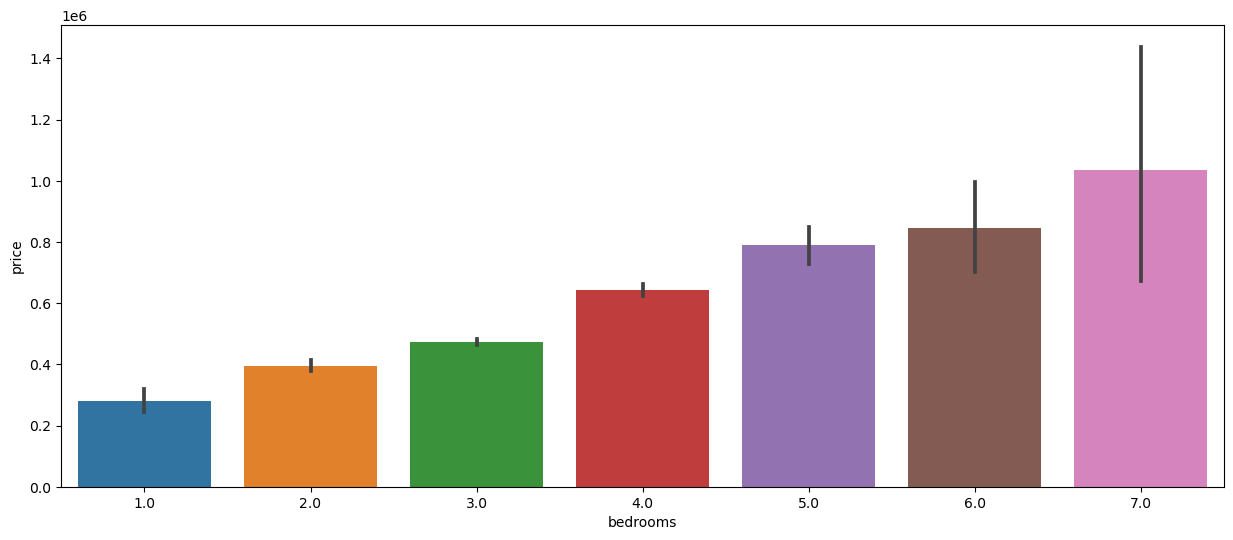

In [50]:
plt.figure(figsize=(15,6))


house_info["bedrooms"]=np.where(house_info["bedrooms"]<7,house_info["bedrooms"],7)

sns.barplot(x=house_info["bedrooms"],y=house_info["price"])


In [51]:
(house_info == 0).sum()
# 49 cell in price =0 !  :\

price               0
bedrooms            0
bathrooms           0
sqft_living         0
floors              0
waterfront       4470
view             4060
sqft_above          0
sqft_basement    2686
city                0
country             0
dtype: int64

<Axes: xlabel='bathrooms', ylabel='bathrooms'>

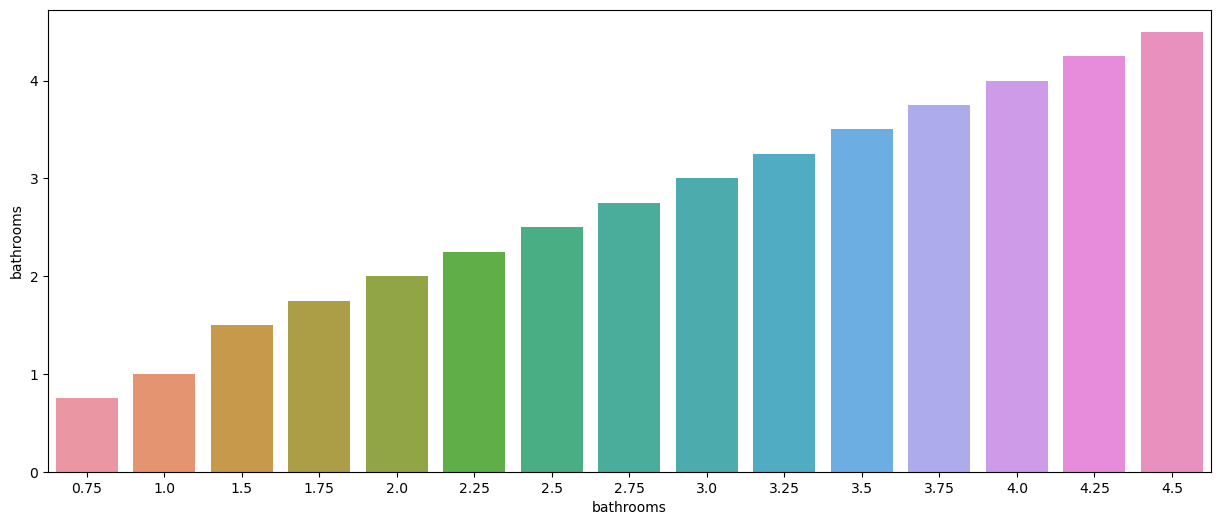

In [52]:
plt.figure(figsize=(15,6))
house_info["bathrooms"]=np.where(house_info["bathrooms"]<4.5,house_info["bathrooms"],4.5)
house_info["bathrooms"]=np.where(house_info["bathrooms"]==1.25,1,house_info["bathrooms"])

sns.barplot(x=house_info["bathrooms"],y=house_info["bathrooms"])


In [53]:
house_info["bathrooms"].value_counts().sort_index() 

bathrooms
0.75      17
1.00     728
1.50     283
1.75     619
2.00     422
2.25     407
2.50    1173
2.75     269
3.00     162
3.25     134
3.50     158
3.75      34
4.00      21
4.25      22
4.50      50
Name: count, dtype: int64

<Axes: xlabel='floors', ylabel='price'>

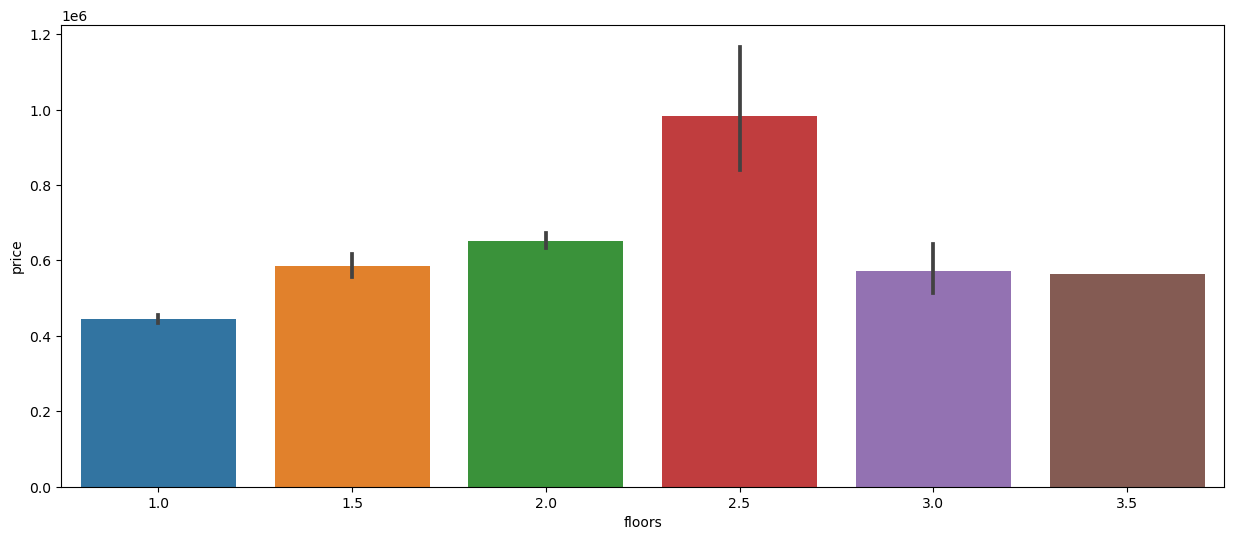

In [54]:
plt.figure(figsize=(15,6))
sns.barplot(x=house_info["floors"],y=house_info["price"])

In [55]:
house_info["floors"].value_counts().sort_index() 

floors
1.0    2117
1.5     438
2.0    1778
2.5      41
3.0     124
3.5       1
Name: count, dtype: int64

<Axes: xlabel='floors', ylabel='price'>

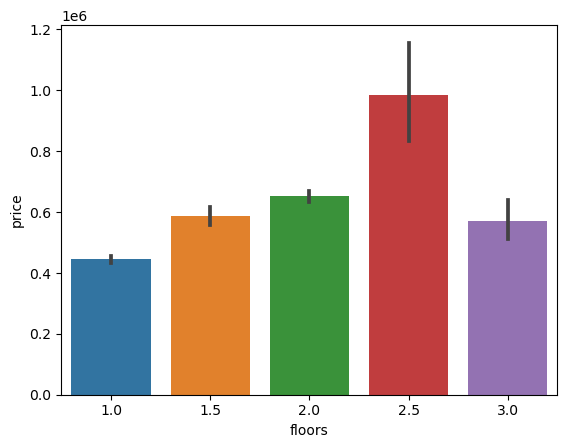

In [56]:
house_info["floors"]=np.where(house_info["floors"]==3.5,3,house_info["floors"])
'''
he chooses 3 cuase when we look at bar block we found that 
2.5> 3 ("doesnt make any scense") so he will add those values to bar 3
'''
#house_info["floors"]=np.where(house_info["floors"]==2.5,3,house_info["floors"])
sns.barplot(x=house_info["floors"],y=house_info["price"])

<Axes: xlabel='view', ylabel='price'>

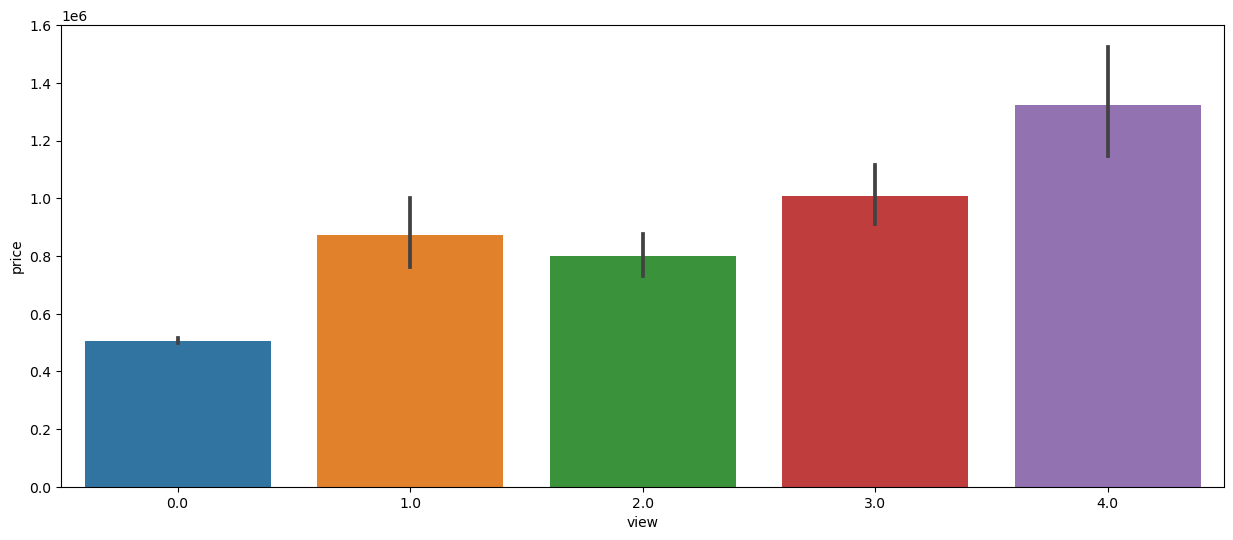

In [57]:
plt.figure(figsize=(15,6))
sns.barplot(x=house_info["view"],y=house_info["price"])

In [58]:
house_info["view"].value_counts().sort_index


<bound method Series.sort_index of view
0.0    4060
2.0     195
3.0     113
1.0      68
4.0      63
Name: count, dtype: int64>

<Axes: xlabel='view', ylabel='price'>

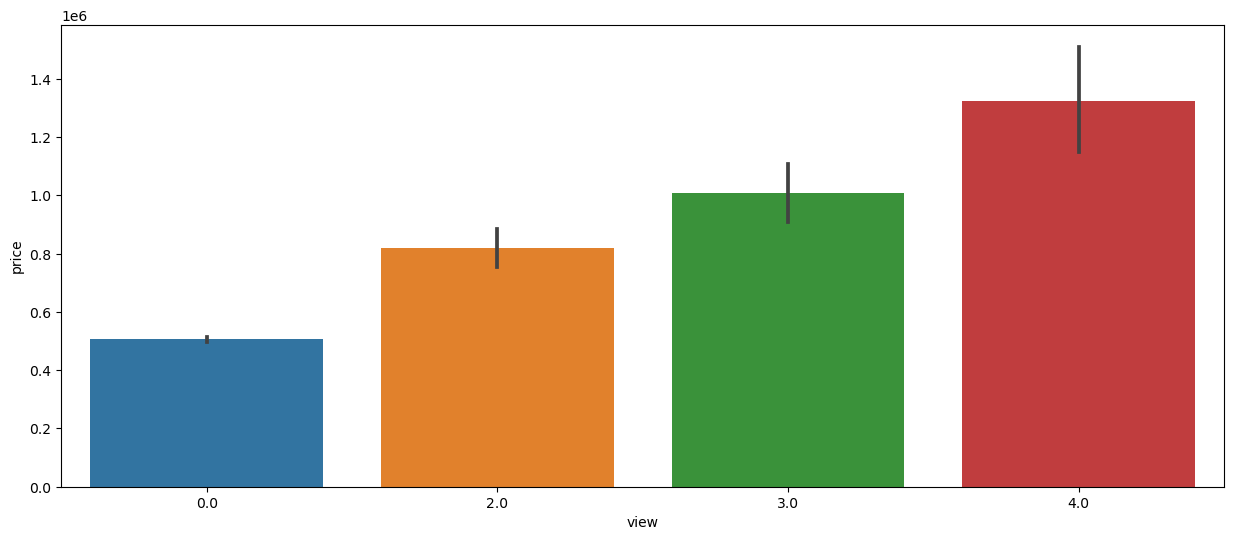

In [59]:
house_info["view"]=np.where(house_info["view"]==1.0,2.0,house_info["view"])
plt.figure(figsize=(15,6))
sns.barplot(x=house_info["view"],y=house_info["price"])

In [60]:
x_input =house_info.drop(["price","city","country"],axis=1)
y_output=house_info["price"]
model = LinearRegression()
model.fit(x_input,y_output)
model.score(x_input,y_output)

0.524619060290509

In [62]:
house_info.describe(include="object")

,city,country
count,4499,4499
unique,44,1
top,Seattle,USA
freq,1541,4499


In [63]:
data_encoded =pd.get_dummies(data=house_info,columns=["city","country"])
data_encoded

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,sqft_above,sqft_basement,city_Algona,...,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point,country_USA
0,3.130000e+05,3.0,1.50,1340.0,1.5,0.0,0.0,1340.0,0.0,False,...,False,True,False,False,False,False,False,False,False,True
1,2.384000e+06,5.0,2.50,3650.0,2.0,0.0,4.0,3370.0,280.0,False,...,True,False,False,False,False,False,False,False,False,True
2,3.420000e+05,3.0,2.00,1930.0,1.0,0.0,0.0,1930.0,0.0,False,...,False,False,False,False,False,False,False,False,False,True
3,4.200000e+05,3.0,2.25,2000.0,1.0,0.0,0.0,1000.0,1000.0,False,...,False,False,False,False,False,False,False,False,False,True
4,5.500000e+05,4.0,2.50,1940.0,1.0,0.0,0.0,1140.0,800.0,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510.0,1.0,0.0,0.0,1510.0,0.0,False,...,True,False,False,False,False,False,False,False,False,True
4596,5.343333e+05,3.0,2.50,1460.0,2.0,0.0,0.0,1460.0,0.0,False,...,False,False,False,False,False,False,False,False,False,True
4597,4.169042e+05,3.0,2.50,3010.0,2.0,0.0,0.0,3010.0,0.0,False,...,False,False,False,False,False,False,False,False,False,True
4598,2.034000e+05,4.0,2.00,2090.0,1.0,0.0,0.0,1070.0,1020.0,False,...,True,False,False,False,False,False,False,False,False,True


In [65]:
x_input= house_info.drop(["price"],axis=1)
x =pd.get_dummies(data=x_input,columns=["city","country"])
y = house_info["price"]

In [66]:
model = LinearRegression()
model.fit(x,y)
model.score(x,y)

0.6940340304122586

# Data Normalization3: In data normalization,
 clipping consists of establishing maximum and minimum values for the dataset and requalifies outliers to these new max or mins.
For example, if you have a dataset consisting of numbers [14, 12, 19, 11, 15, 17, 18, 95], the number 95 is a big outlier.
We can clip it out of the data by reassigning a new high.


Q1-**i just can not under stand when i clip those values or reduce its values , it should make the accuracy reduced too?**

A1) 1-Outliers: In many datasets, there can be extreme values or “outliers” that are significantly higher or lower than most other values in the dataset. These outliers can disproportionately affect the performance of some machine learning algorithms, leading to less accurate predictions. By clipping these outliers to a maximum and/or minimum value, we can prevent them from having an outsized impact on the model.
   
2-Scale Sensitivity: Some machine learning algorithms, like **K-Nearest Neighbors (KNN) and Support Vector Machines (SVM)**, ***are sensitive to the scale of the features***. If one feature has a range of 0-1 and another has a range of 0-1000, **the algorithm might give more weight to the larger range feature, even if it’s not necessarily more important**. Normalizing or clipping the data to the same scale can prevent this issue.


3- **Gradient Descent Convergence**: For algorithms that use gradient descent to optimize their parameters (like neural networks and linear regression), having features on the same scale can help the algorithm converge more quickly and efficiently, leading to better performance.

***Remember, while normalization can improve model accuracy in many cases, #it’s not always the best choice for every dataset or algorithm. It’s important to understand your data and the requirements of your specific use case when deciding whether to use normalization. I hope this helps clarify things ***



Q2 **how i decide that i have to use  linear regression instead of all models** ?

a1) 1_**Continuous Data**: Linear regression works best when your dependent variable is continuous (i.e., it can take on any value within a range) and your independent variables are either continuous or categorical (ex relation between price and views )


2_ **Linear Relationship**: 
'''
The relationship between independent and dependent variables should be linear(
bathroom , sqtf(living - basement ) etc we can minimize the error using line كدة تمام:)
 )
'''
. That is, the line of best fit through the data points is a straight line, ***rather than a curve or some sort of grouping factor4***



3-***No Extreme Outliers***(ظبطناها قبل ما نبدأ فعلا :): Linear regression is**sensitive to outlier effects**. So, if your data contains extreme outliers, it might be necessary to address these before applying linear regression


4- ***Multivariate Normality***: The linear regression analysis requires all variables to be multivariate normal(so this other reasons for clipping). This assumption can best be checked with a histogram or a Q-Q-Plot(عشان كدة هو قال افضل نستخدمه لانه بيورينا بشكل افضل هم ماشين بتدرج طبيعي ولا لاء )

***This assumption means that the residuals (the differences between the observed and predicted values) should follow a normal distribution. Let’s say you’re predicting house prices based on features like size and location. If the model is working well, the differences between the actual and predicted prices (the residuals) should be randomly scattered around zero, and follow a bell-shaped (normal) distribution. If the residuals show some pattern (for example, they get larger for more expensive houses), it suggests that the model isn’t capturing some aspect of the data, and its predictions may not be reliable.***



5-**Little or No Multicollinearity**: Multicollinearity is a state of very high intercorrelations or inter-associations among the independent variables. It is therefore a type of disturbance in the data, and if present in the data the statistical inferences made about the data may not be reliable

***

*Multicollinearity* refers to a situation where two or more independent variables in a regression model ***are highly correlated***. For example, let’s say you’re trying to predict a person’s weight based on their height and their waist size. These two independent variables (height and waist size) are likely to be highly correlated, because taller people generally have larger waist sizes. This multicollinearity can ***make it difficult for the model to determine the effect of each independent variable on the dependent variable (weight)***, **because changes in one independent variable are associated with changes in the other***. This can lead to unstable estimates and reduced predictive power.
***


***how we can figure that we have multicollinearity?***

1-**(Correlation Matrix)**: This is like a report card that shows how much each variable is related to the others. If two variables are getting the same score (close to -1 or +1), they are highly correlated. This means they might be **saying the same thing**, which is a sign of multicollinearity


2-**(Variance Inflation Factor (VIF))**: Imagine you’re trying to understand the influence of one friend in a group. If that friend is very similar to another one in the group, **it’s hard to tell who is influencing the group’s decisions**. 
(( VIF is a measure that tells you how much the presence of other friends (variables) affects your understanding of one friend (variable). If the VIF is high (greater than 5 or 10), it means that friend (variable) is not unique in the group, indicating multicollinearity.((



3-**Tolerance**: This is the opposite of VIF. It tells you how much unique information a friend (variable) brings to the group. If the tolerance **is low (less than 0.2 or 0.1)**, that friend (variable) doesn’t bring much new to the group, indicating multicollinearity.


4-**Condition Index**(not totally clear   \: ): This is like a health check-up report for your data. If the condition index is above 30, it’s a sign that your data is not in good health due to multicollinearity.


Hot encoding 

**How Does One-Hot Encoding Work?**:
In one-hot encoding, each category in a feature is represented as a **binary vector1**. All values in the vector are zero, except for the index that represents the categorical value, which is marked with a 1. For example, for the feature “color” with categories “red”, “blue”, and “green”, one-hot encoding would create **three new features: “color_red”, “color_blue”, and “color_green”**. If a data point has the color “red”, it would be represented as [1, 0, 0].